In [123]:
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)


In [124]:
iata_spain = pd.read_csv('iata_spain.csv')
iata_spain.head()


code     location                                   name
0  PEK      Beijing  Beijing Capital International Airport
1  LAX  Los Angeles      Los Angeles International Airport
2  DXB        Dubai            Dubai International Airport
3  HND        Tokyo                   Tokyo Haneda Airport
4  ORD      Chicago           O'Hare International Airport

In [125]:
iata_spain.set_index(["code"], inplace=True)
iata_spain.head()

location                                   name
code                                                    
PEK       Beijing  Beijing Capital International Airport
LAX   Los Angeles      Los Angeles International Airport
DXB         Dubai            Dubai International Airport
HND         Tokyo                   Tokyo Haneda Airport
ORD       Chicago           O'Hare International Airport

In [126]:
iata_spain.loc["LAX"]

location                          Los Angeles
name        Los Angeles International Airport
Name: LAX, dtype: object

In [127]:
spain_flights = pd.read_csv("sample_spain_fligthts.csv")
spain_flights.head()

origin destination  duration  price
0    PEK         LAX     100.0    370
1    PEK         LAX      85.0    196
2    PEK         DXB     150.0    613
3    PEK         HND      95.0    728
4    PEK         ORD      70.0     57

In [128]:
spain_flights.describe()

duration        price
count  121.000000   121.000000
mean   106.280992   286.950413
std     50.421263   254.885787
min     30.000000     6.000000
25%     65.000000   108.000000
50%     90.000000   213.000000
75%    150.000000   358.000000
max    220.000000  1326.000000

In [129]:
import networkx as nx
DG=nx.DiGraph()
for row in spain_flights.iterrows():
    DG.add_edge(row[1]["origin"],
                row[1]["destination"],
                duration=row[1]["duration"],
                price=row[1]["price"])

In [130]:
DG.nodes(data=True)

NodeDataView({'PEK': {}, 'LAX': {}, 'DXB': {}, 'HND': {}, 'ORD': {}, 'UIO': {}, 'AMS': {}, 'MEX': {}, 'FRA': {}, 'GYE': {}, 'BOG': {}, 'EZE': {}, 'MUC': {}, 'LHR': {}, 'SFO': {}, 'IST': {}, 'CUE': {}, 'ZRH': {}, 'CLO': {}, 'CDG': {}, 'SIN': {}, 'DFW': {}, 'PVG': {}, 'SYD': {}, 'MAD': {}, 'JFK': {}, 'HKG': {}, 'ICN': {}, 'BKK': {}, 'SVO': {}, 'GRU': {}, 'YYZ': {}, 'DEL': {}, 'BCN': {}, 'BBK': {}})

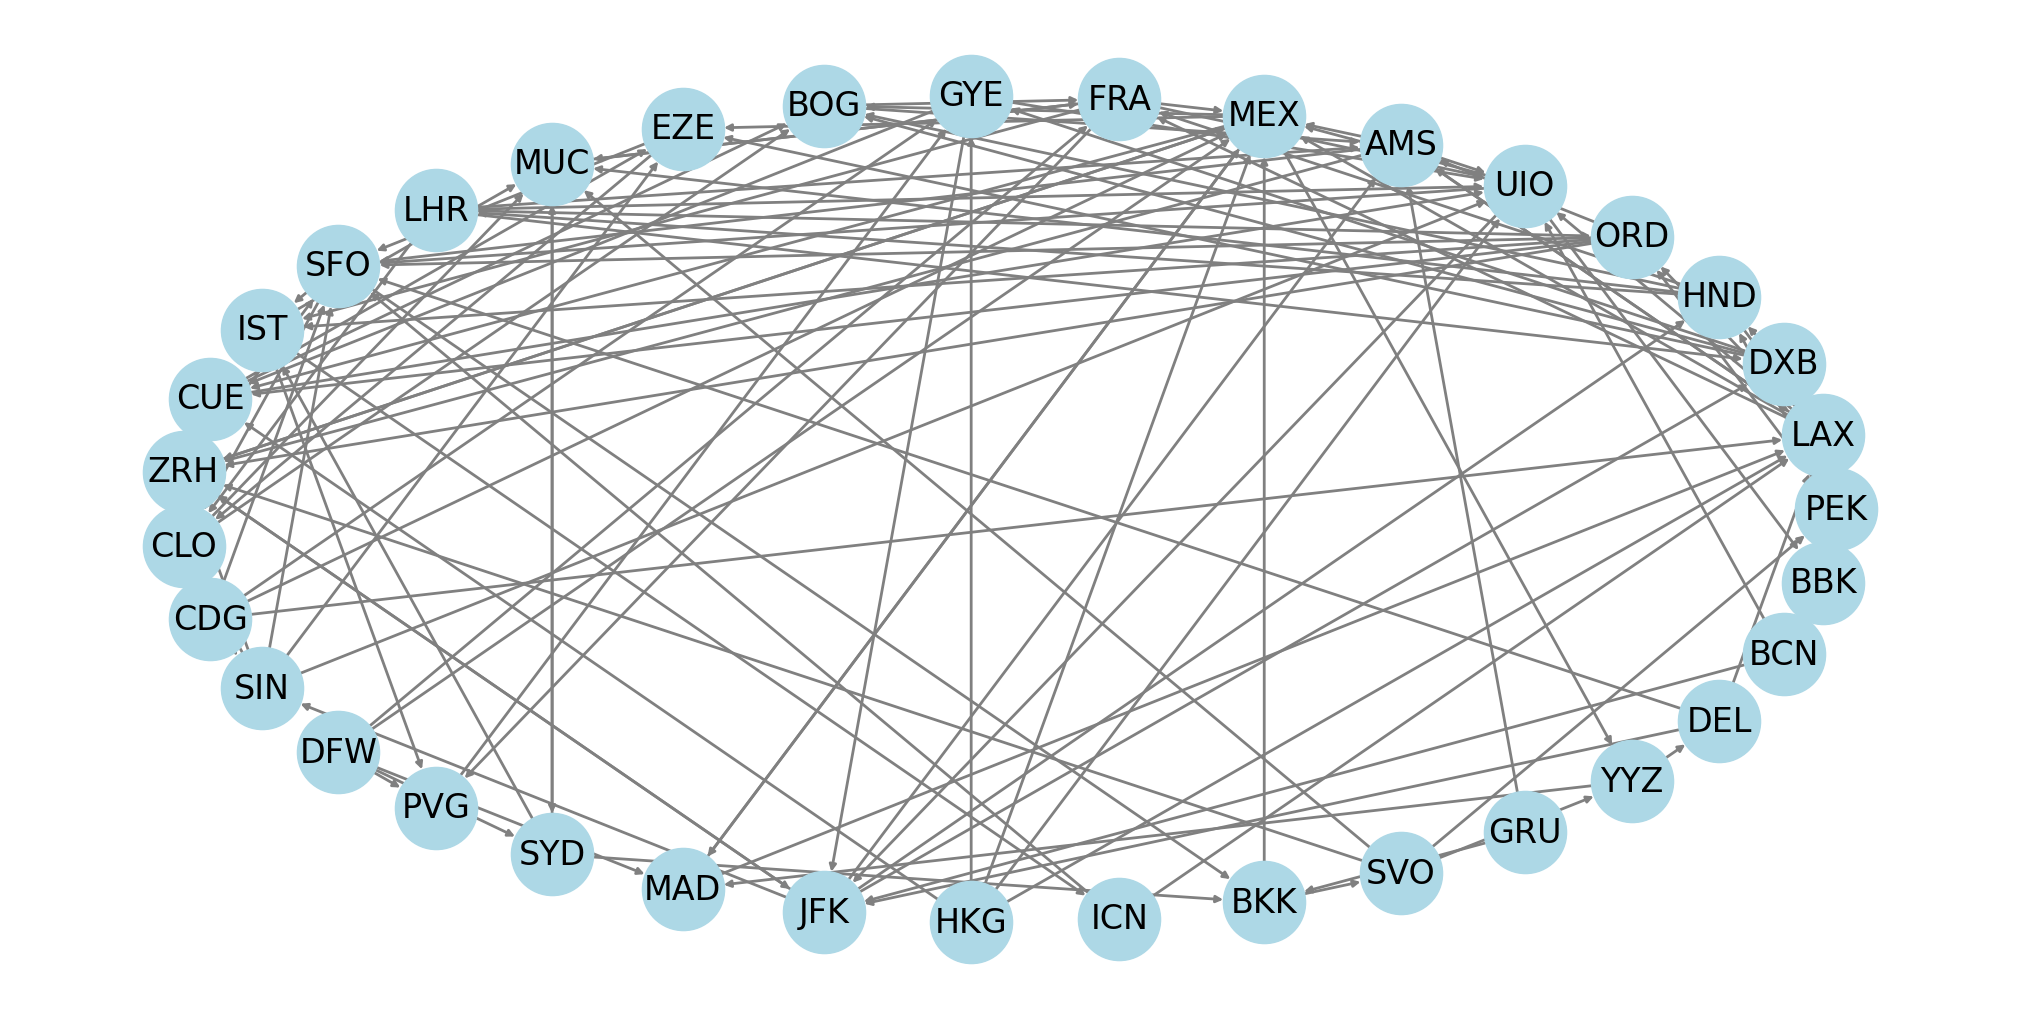

In [131]:
nx.draw_circular(DG,
                 node_color="lightblue",
                 edge_color="gray",
                 font_size=24,
                 width=2, with_labels=True, node_size=3500,
)

In [132]:
list(nx.all_shortest_paths(DG, source="SYD", target="UIO", weight=None))

[['SYD', 'MUC', 'FRA', 'UIO']]

In [135]:
list(nx.dijkstra_path(DG, source="CUE", target="SVO", weight=None))

['CUE', 'UIO', 'SFO', 'BKK', 'SVO']

In [ ]:
list(nx.astar_path(DG, ("HKG"), ("UIO"), weight="price"))

In [ ]:
def get_all_shortest_paths(DiGraph, origin, destination):
    print("*** All shortest paths - Origen: %s Destino: %s" % (
        origin, destination
    ))
    for weight in [None, "duration", "price"]:
        print("* Ordenando por: %s" % weight)
        paths = list(nx.all_shortest_paths(DiGraph,
                                          source=origin,
                                          target=destination,
                                          weight=weight))
        for path in paths:
            print("   Camino óptimo: %s" % path)
            show_path(path)

In [122]:
get_all_shortest_paths(DG, origin="BKK", destination="LAX")

*** All shortest paths - Origen: BKK Destino: LAX
* Ordenando por: None
   Camino óptimo: ['BKK', 'SVO', 'PEK', 'LAX']
    Suvarnabhumi Airport -> Sheremetyevo International Airport
    - Duration: 190.0 Price: 541 €
    Sheremetyevo International Airport -> Beijing Capital International Airport
    - Duration: 65.0 Price: 234 €
    Beijing Capital International Airport -> Los Angeles International Airport
    - Duration: 85.0 Price: 196 €

     Total Duration: 340.0 Total price: 971 € 

   Camino óptimo: ['BKK', 'MEX', 'MAD', 'LAX']
    Suvarnabhumi Airport -> Mexico City International Airport
    - Duration: 135.0 Price: 135 €
    Mexico City International Airport -> Adolfo Suárez Madrid-Barajas Airport
    - Duration: 45.0 Price: 213 €
    Adolfo Suárez Madrid-Barajas Airport -> Los Angeles International Airport
    - Duration: 45.0 Price: 24 €

     Total Duration: 225.0 Total price: 372 € 

* Ordenando por: duration
   Camino óptimo: ['BKK', 'MEX', 'MAD', 'LAX']
    Suvarnabhumi A

In [24]:
def plot_shortest_path(path):
    print(path)
    positions = nx.circular_layout(DG)
    
    nx.draw(DG, pos=positions,
                node_color='lightblue',
                edge_color='gray',
                font_size=24,
                width=1, with_labels=True, node_size=3500, alpha=0.8
           )
    
    short_path=nx.DiGraph()
    for i in range(len(path)-1):
        short_path.add_edge(path[i], path[i+1])
    
    nx.draw(short_path, pos=positions,
                node_color='dodgerblue',
                edge_color='dodgerblue',
                font_size=24,
                width=3, with_labels=True, node_size=3000
           )
    plt.show()
        

In [25]:
def get_shortest_path(DiGraph, origin, destination):
    print("*** Origen: %s Destino: %s" % (origin, destination))
    
    for weight in [None, "duration", "price"]:
        print(" Ordenado por: %s" % weight)
        path = list(nx.astar_path(DiGraph,
                                  (origin),
                                  (destination),
                                  weight=weight
                                 ))
        print("   Camino óptimo: %s " % path)
        show_path(path)
        plot_shortest_path(path)

*** Origen: BKK Destino: UIO
 Ordenado por: None
   Camino óptimo: ['BKK', 'MEX', 'CUE', 'UIO'] 
    Suvarnabhumi Airport -> Mexico City International Airport
    - Duration: 135.0 Price: 135 €
    Mexico City International Airport -> Aeropuerto Internacional Mariscal Lamar
    - Duration: 70.0 Price: 183 €
    Aeropuerto Internacional Mariscal Lamar -> Aeropuerto Internacional Mariscal Sucre
    - Duration: 110.0 Price: 462 €

     Total Duration: 315.0 Total price: 780 € 

['BKK', 'MEX', 'CUE', 'UIO']


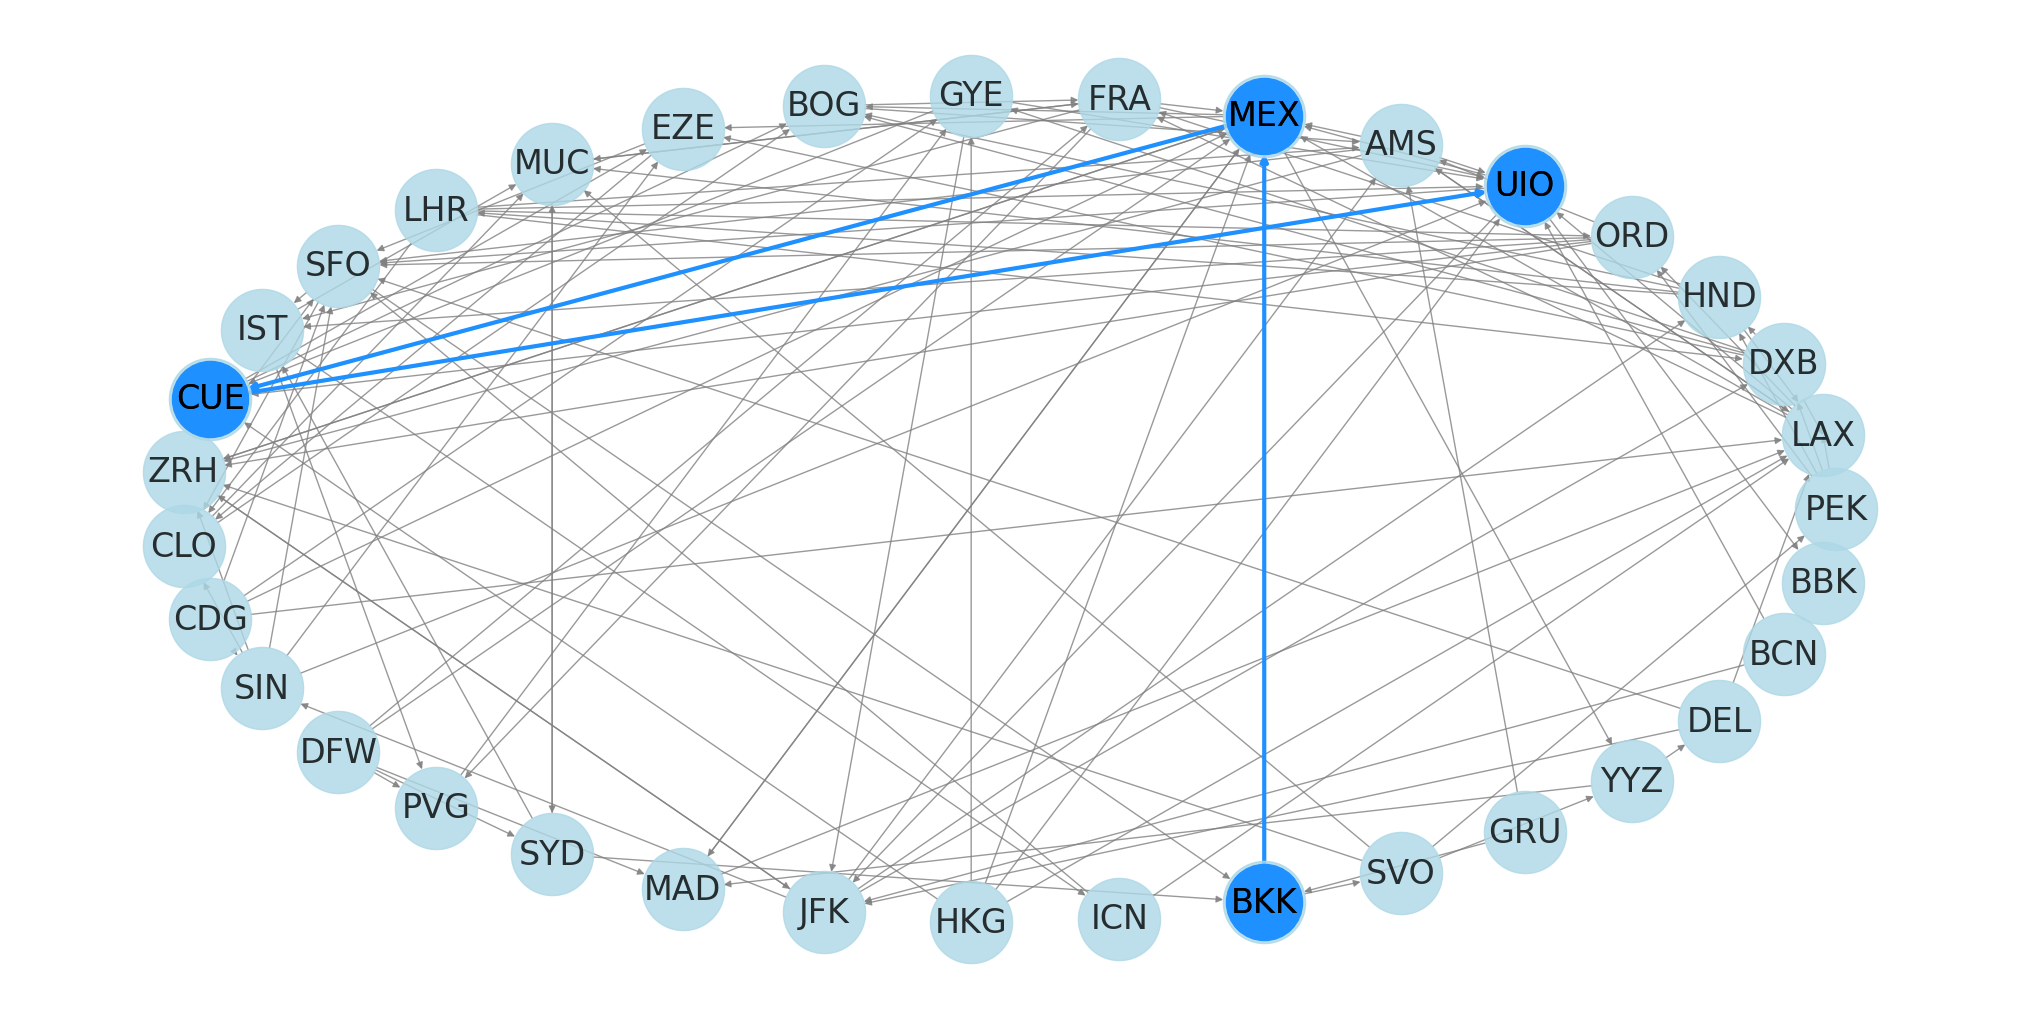

 Ordenado por: duration
   Camino óptimo: ['BKK', 'MEX', 'CUE', 'UIO'] 
    Suvarnabhumi Airport -> Mexico City International Airport
    - Duration: 135.0 Price: 135 €
    Mexico City International Airport -> Aeropuerto Internacional Mariscal Lamar
    - Duration: 70.0 Price: 183 €
    Aeropuerto Internacional Mariscal Lamar -> Aeropuerto Internacional Mariscal Sucre
    - Duration: 110.0 Price: 462 €

     Total Duration: 315.0 Total price: 780 € 

['BKK', 'MEX', 'CUE', 'UIO']


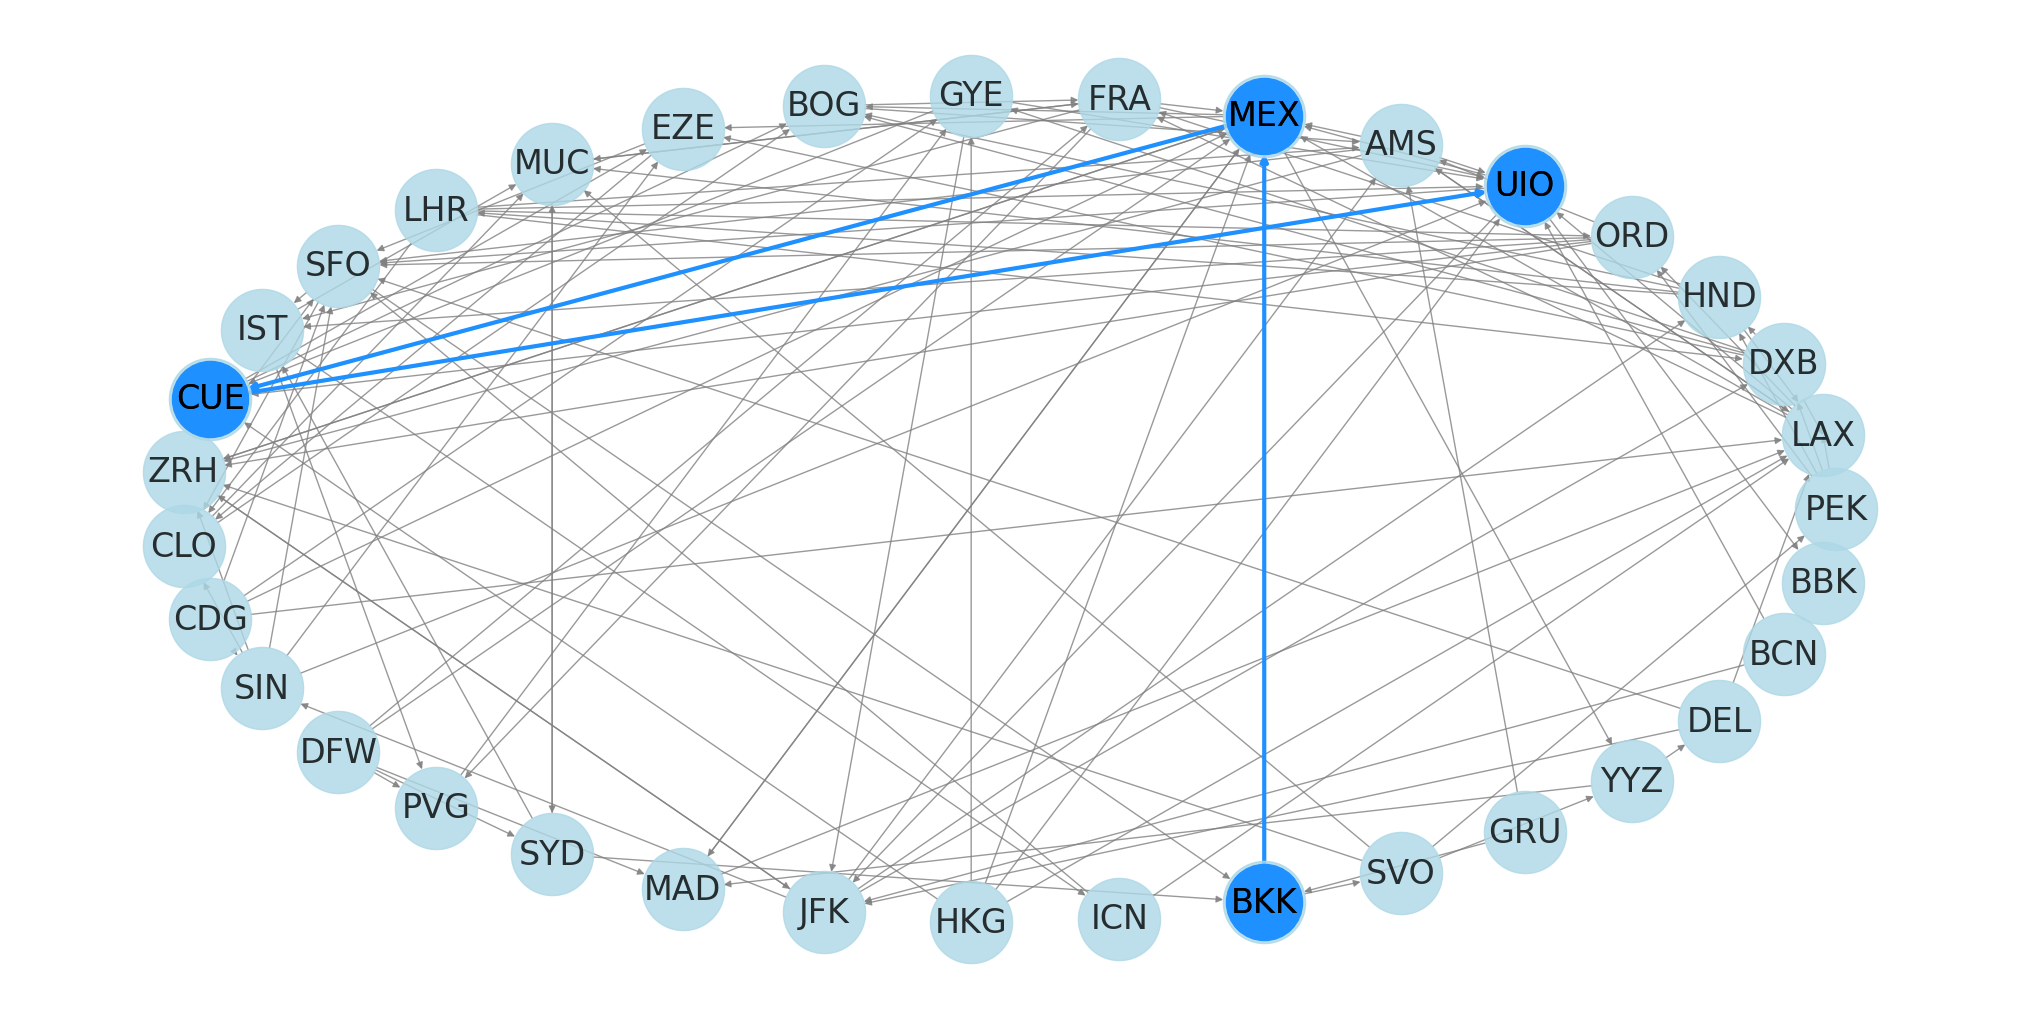

 Ordenado por: price
   Camino óptimo: ['BKK', 'MEX', 'MAD', 'LAX', 'UIO'] 
    Suvarnabhumi Airport -> Mexico City International Airport
    - Duration: 135.0 Price: 135 €
    Mexico City International Airport -> Adolfo Suárez Madrid-Barajas Airport
    - Duration: 45.0 Price: 213 €
    Adolfo Suárez Madrid-Barajas Airport -> Los Angeles International Airport
    - Duration: 45.0 Price: 24 €
    Los Angeles International Airport -> Aeropuerto Internacional Mariscal Sucre
    - Duration: 140.0 Price: 87 €

     Total Duration: 365.0 Total price: 459 € 

['BKK', 'MEX', 'MAD', 'LAX', 'UIO']


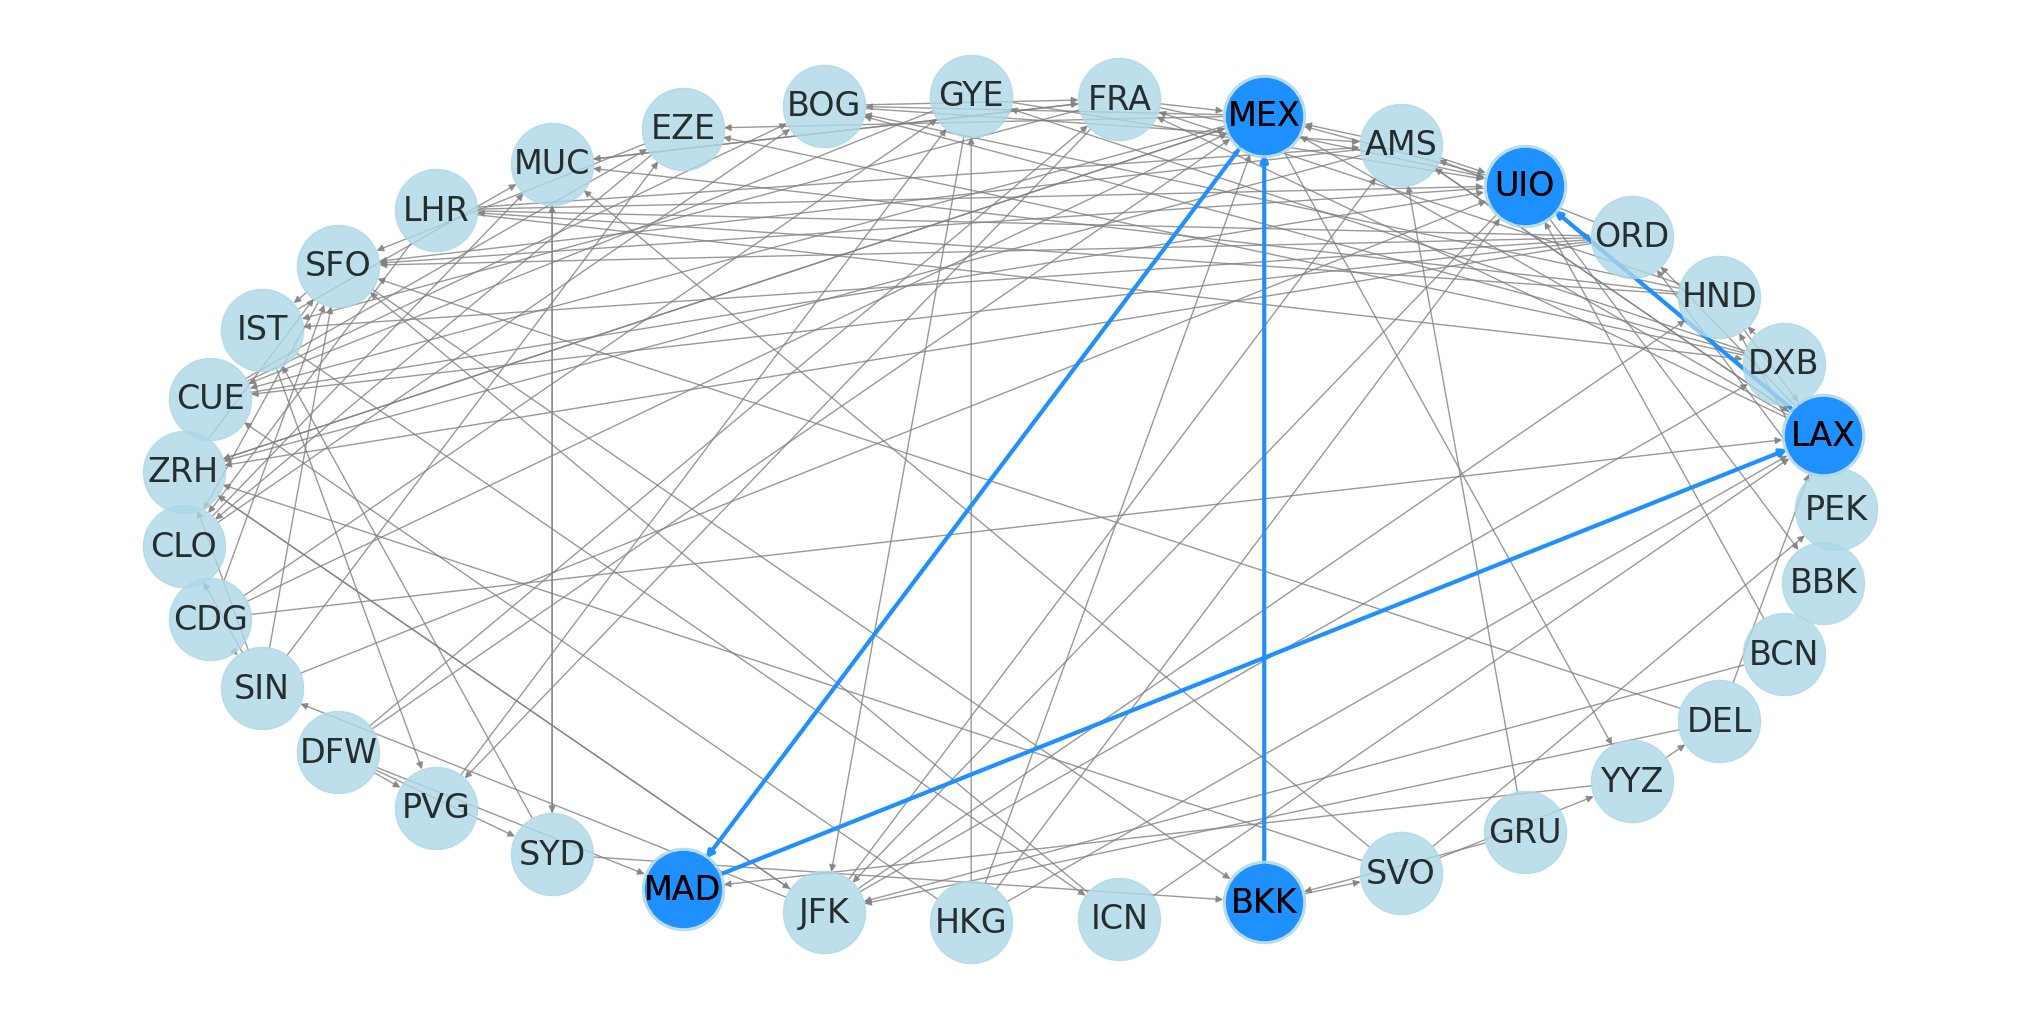

In [108]:
get_shortest_path(DG, origin="BKK", destination="UIO")

*** Origen: SYD Destino: MEX
 Ordenado por: None
   Camino óptimo: ['SYD', 'BKK', 'MEX'] 
    Sydney Kingsford Smith Airport -> Suvarnabhumi Airport
    - Duration: 170.0 Price: 289 €
    Suvarnabhumi Airport -> Mexico City International Airport
    - Duration: 135.0 Price: 135 €

     Total Duration: 305.0 Total price: 424 € 

['SYD', 'BKK', 'MEX']


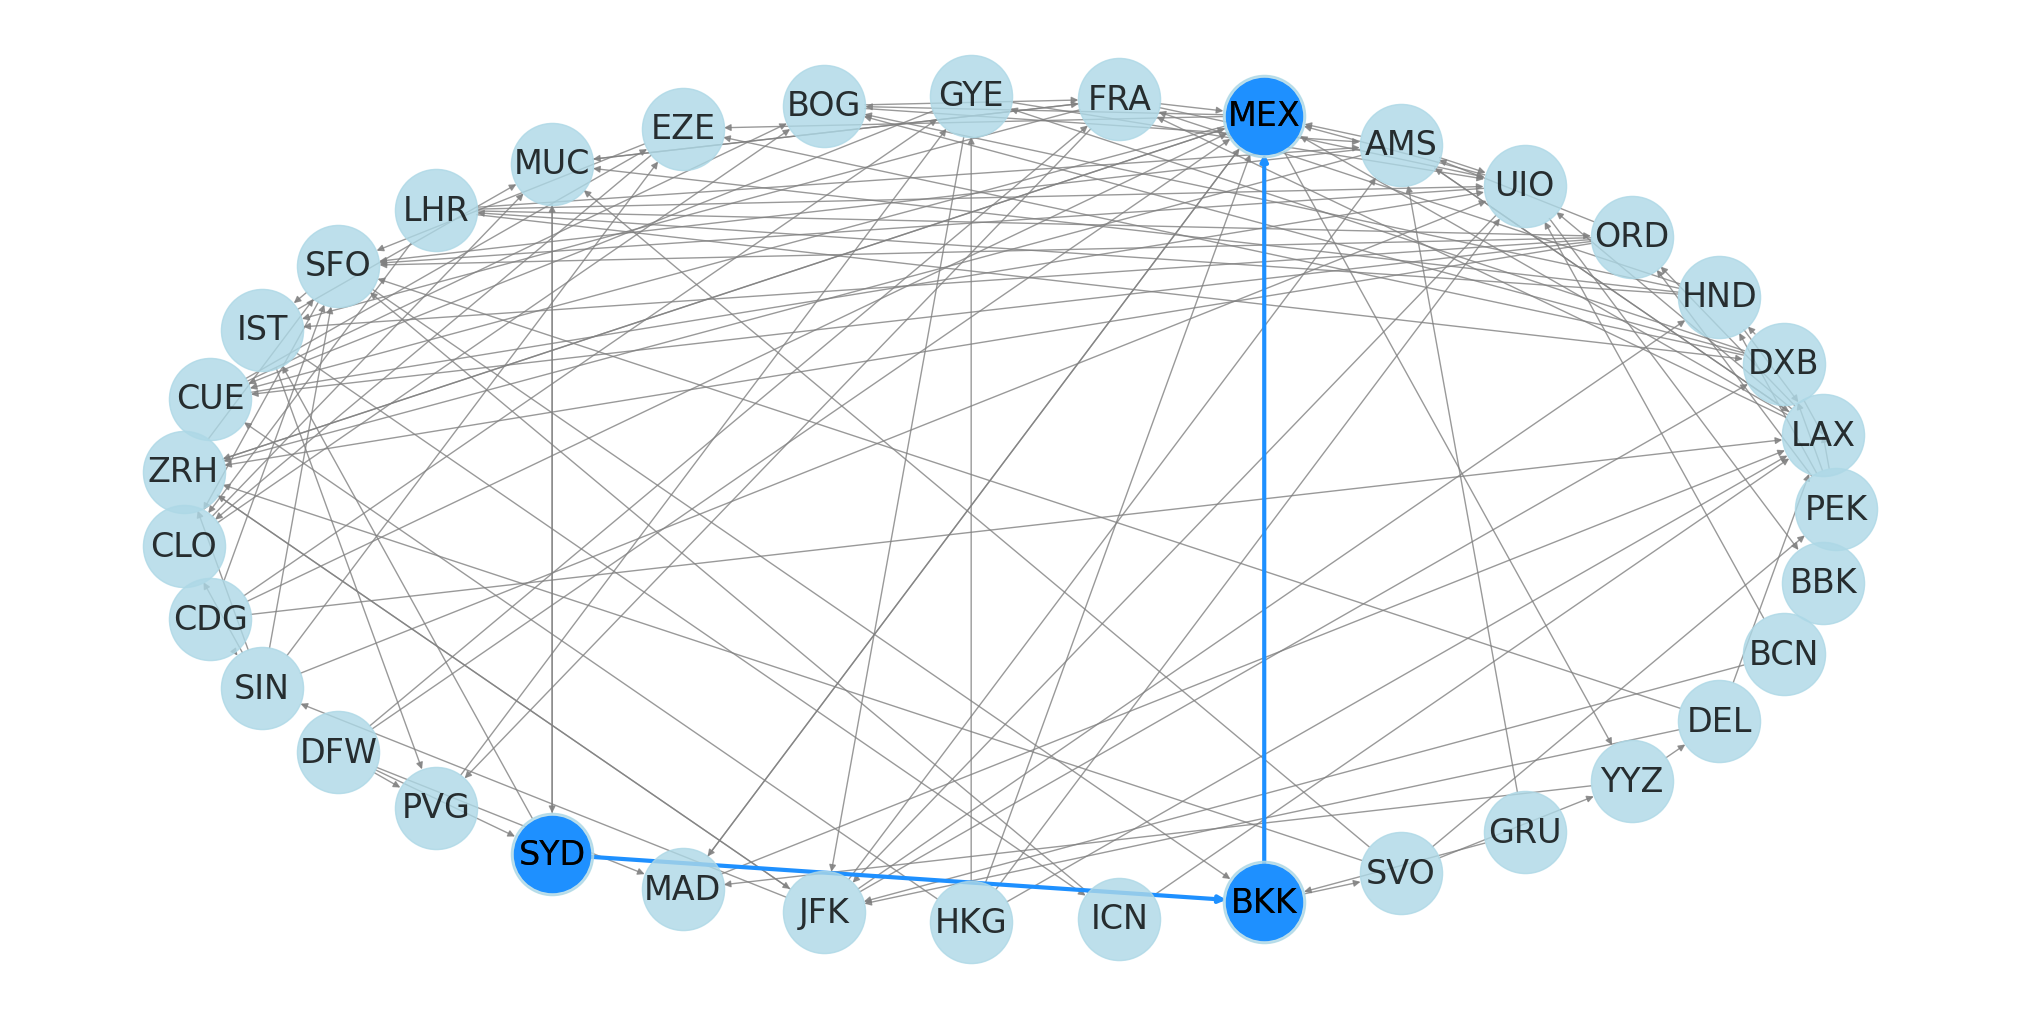

 Ordenado por: duration
   Camino óptimo: ['SYD', 'MUC', 'FRA', 'MEX'] 
    Sydney Kingsford Smith Airport -> Munich Airport
    - Duration: 85.0 Price: 107 €
    Munich Airport -> Frankfurt Airport
    - Duration: 75.0 Price: 289 €
    Frankfurt Airport -> Mexico City International Airport
    - Duration: 65.0 Price: 324 €

     Total Duration: 225.0 Total price: 720 € 

['SYD', 'MUC', 'FRA', 'MEX']


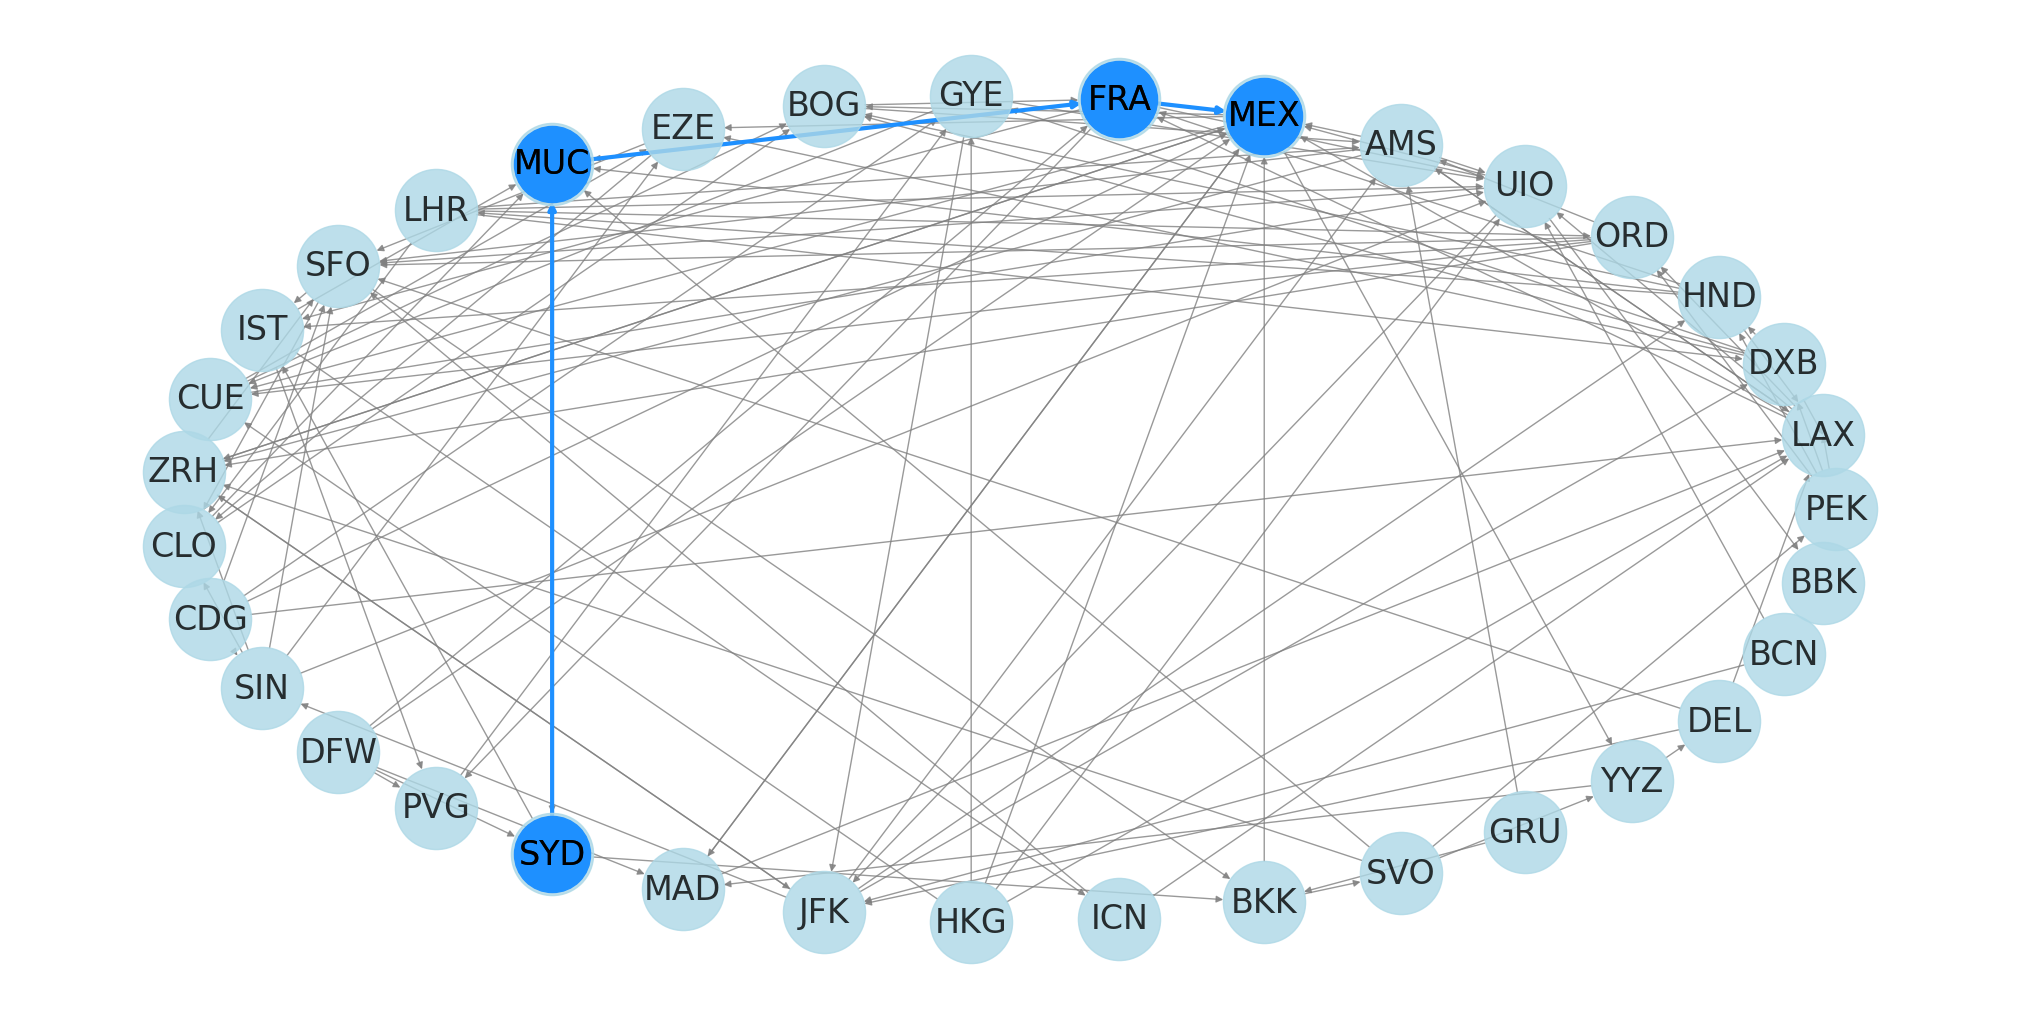

 Ordenado por: price
   Camino óptimo: ['SYD', 'BKK', 'MEX'] 
    Sydney Kingsford Smith Airport -> Suvarnabhumi Airport
    - Duration: 170.0 Price: 289 €
    Suvarnabhumi Airport -> Mexico City International Airport
    - Duration: 135.0 Price: 135 €

     Total Duration: 305.0 Total price: 424 € 

['SYD', 'BKK', 'MEX']


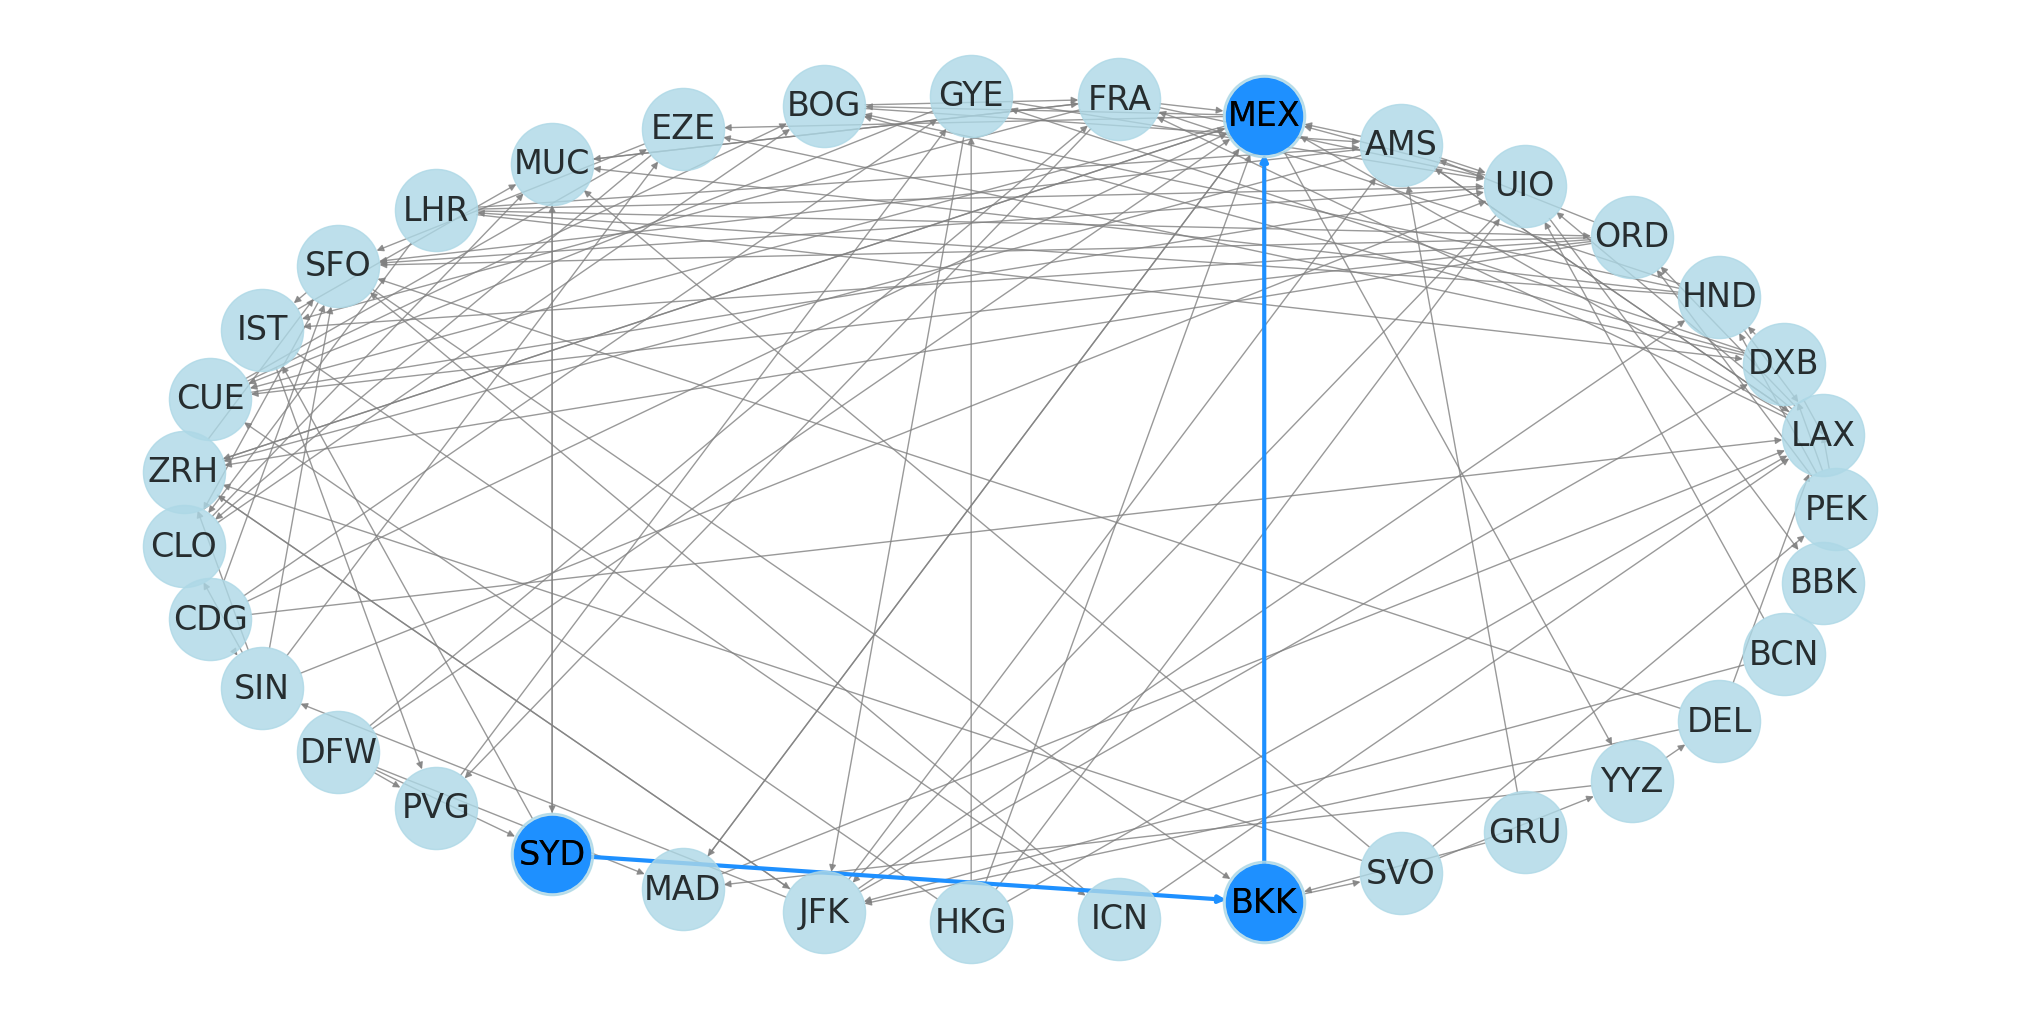

In [109]:
get_shortest_path(DG, origin="SYD", destination="MEX")

In [136]:
import networkx as nx

# Crear un grafo de ejemplo
DG = nx.DiGraph()

def add_route(graph, origin, destination, duration, price):
    
    # Verificar si los nodos existen en el grafo; si no, añadirlos
    if origin not in graph:
        graph.add_node(origin)
        print(f"Nodo {origin} añadido al grafo.")
    
    if destination not in graph:
        graph.add_node(destination)
        print(f"Nodo {destination} añadido al grafo.")
    
    # Agregar la arista con los atributos de duración y precio
    graph.add_edge(origin, destination, duration=duration, price=price)
    print(f"Ruta añadida: {origin} -> {destination}, Duración: {duration} minutos, Precio: {price} €")

# Ejemplo de uso de la función
add_route(DG, 'LAX', 'JFK', 300, 500)


Nodo LAX añadido al grafo.
Nodo JFK añadido al grafo.
Ruta añadida: LAX -> JFK, Duración: 300 minutos, Precio: 500 €
